# Problem Statement

1.	A cloth manufacturing company is interested to know about the different attributes contributing to high sales. Build a decision tree & random forest model with Sales as target variable (first convert it into categorical variable).

--------------- ### ----------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Lets load our dataset as data

In [2]:
data = pd.read_csv("Company_Data.csv")
data.shape

(400, 11)

We have 400 rows and 11 columns

- Lets explore our dataset

In [3]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [4]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

<AxesSubplot:>

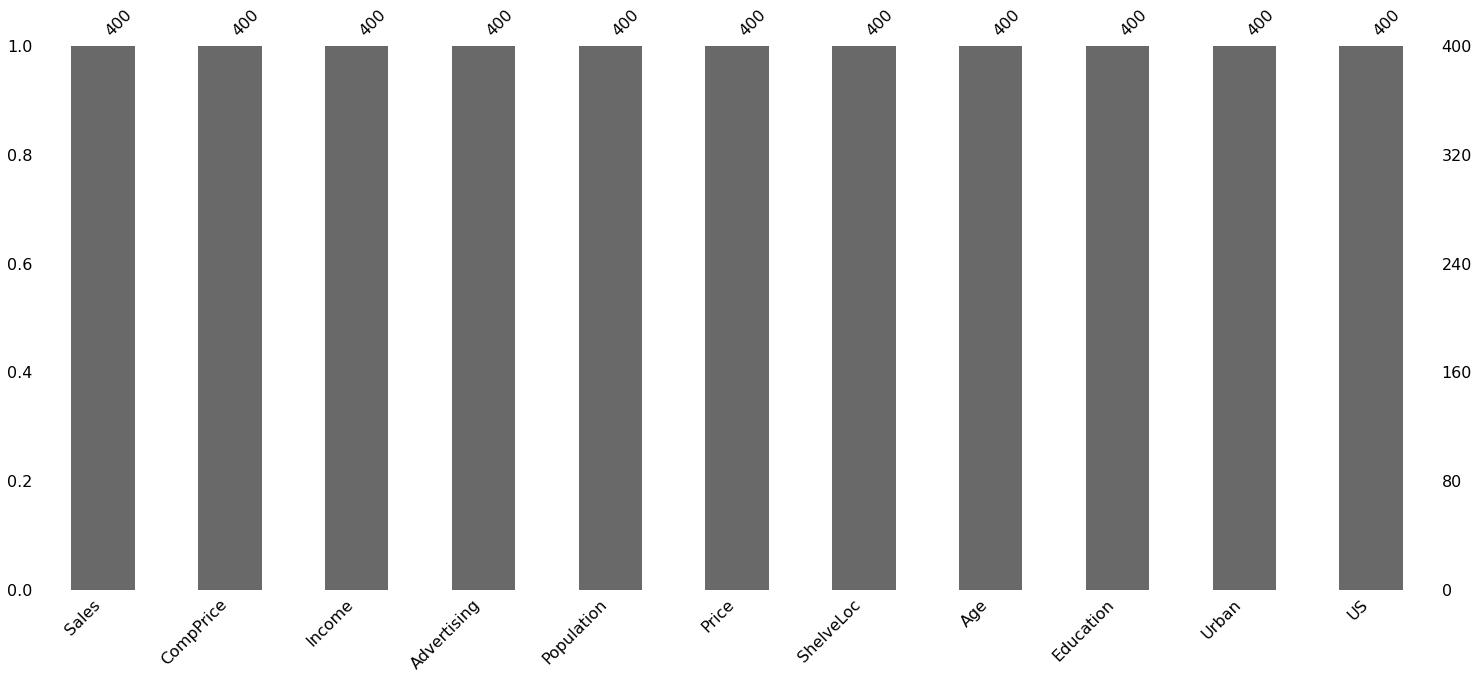

In [5]:
msno.bar(data)

There are no missing values in our dataset

In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


We will now visualize our dataset

In [7]:
plt.rcParams['figure.figsize'] = (15,10)

<AxesSubplot:ylabel='Frequency'>

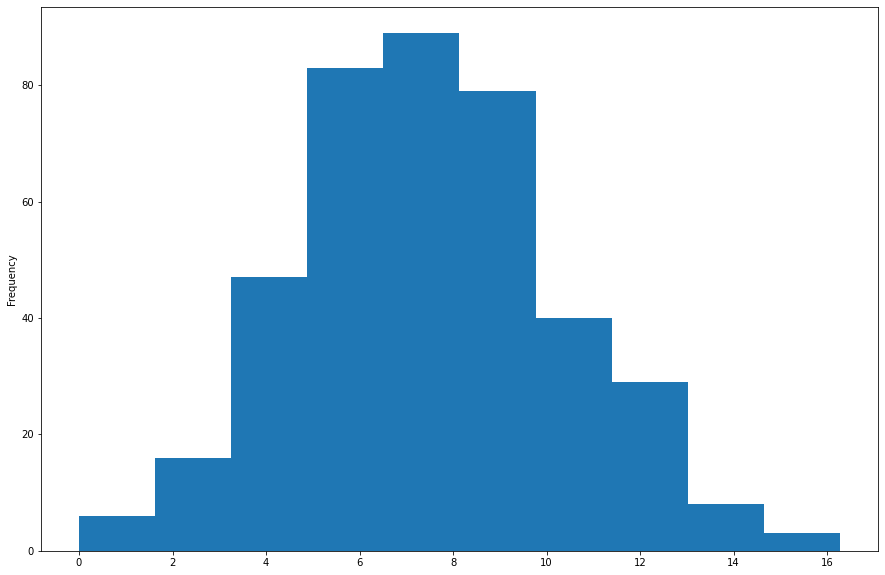

In [8]:
data['Sales'].plot(kind='hist')

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Advertising'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>]],
      dtype=object)

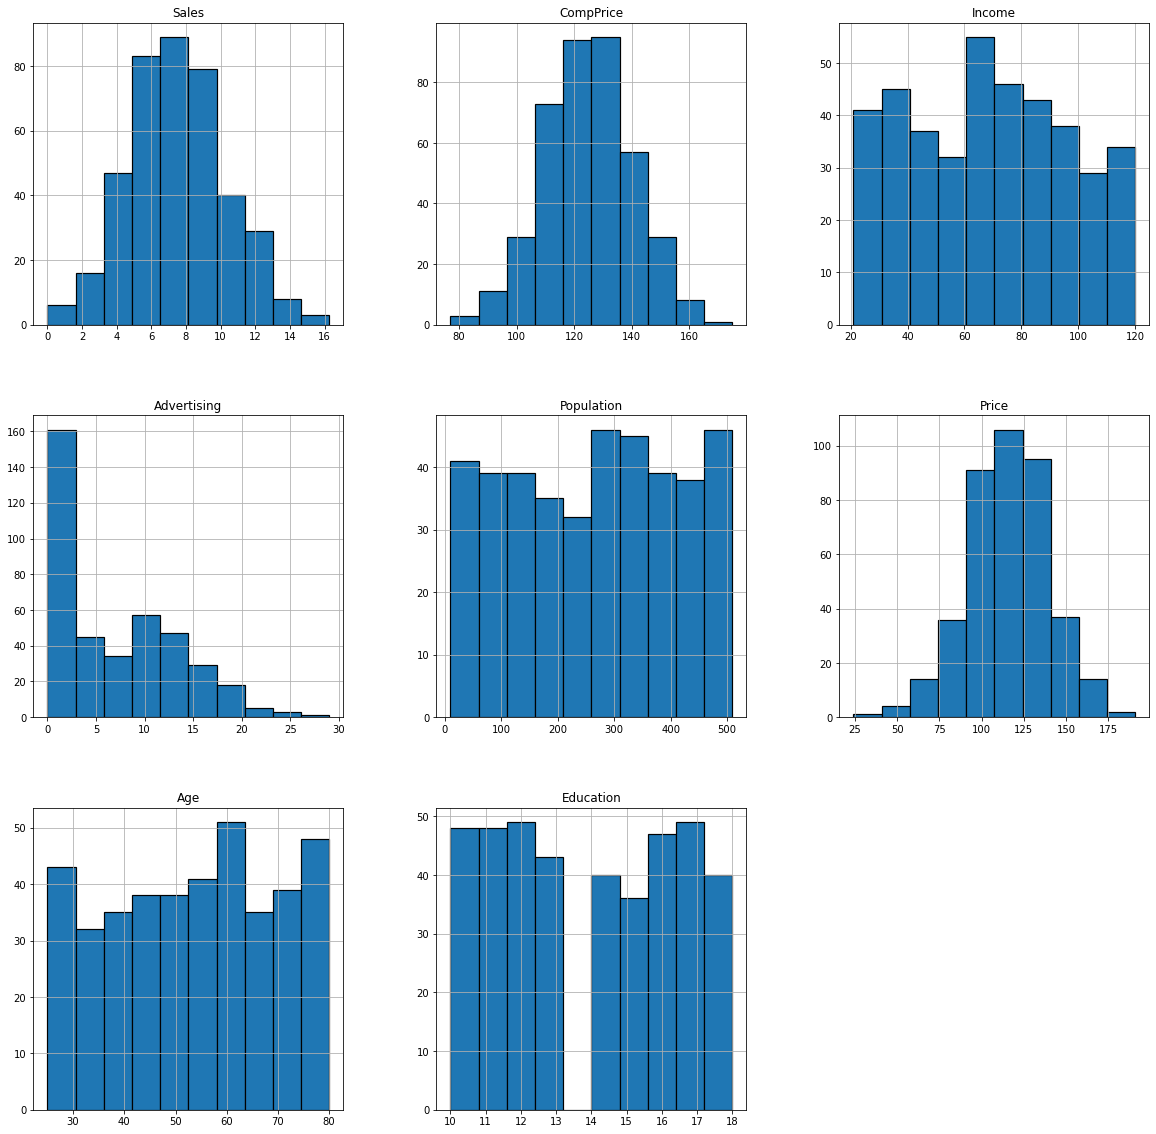

In [9]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

We are asked to create a categorical variable for Sales column, since there is no information provided on how to classify the column into a categorical variable, we will use Median value. From the describe method we saw mean and median are almost identical. So anything below 7.49 will be termed as low sales and anything above or equal to 7.49 will be considered as High sales

In [11]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


We will also create binary values for ShelveLoc, Urban, US, Price, Age, Education

In [28]:
data['Education'].value_counts()

17    49
12    49
10    48
11    48
16    47
13    43
14    40
18    40
15    36
Name: Education, dtype: int64

Transformation of our dataset

In [21]:
data['Sales_Categorical'] = np.where(data['Sales'] <= 7.49,"Low Sales","High Sales")

In [22]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Categorical
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales


In [25]:
data['Age_bins'] = pd.cut(data['Age'], bins=5, labels=['Bin_1','Bin_2',"Bin_3",'Bin_4','Bin_5'])

In [26]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Categorical,Age_bins
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales,Bin_2
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales,Bin_4
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales,Bin_4
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales,Bin_3
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales,Bin_2


In [27]:
data['Age_bins'].value_counts()

Bin_4    87
Bin_1    82
Bin_5    81
Bin_3    78
Bin_2    72
Name: Age_bins, dtype: int64

In [38]:
data['Education_bins'] = pd.cut(data['Education'], bins=4, labels=['Education_Bin1','Education_Bin2','Education_Bin3','Education_Bin4'])

In [39]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Categorical,Age_bins,Education_bins
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales,Bin_2,Education_Bin4
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales,Bin_4,Education_Bin1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales,Bin_4,Education_Bin1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales,Bin_3,Education_Bin2
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales,Bin_2,Education_Bin2


In [40]:
data['Education_bins'].value_counts()

Education_Bin1    145
Education_Bin4     89
Education_Bin2     83
Education_Bin3     83
Name: Education_bins, dtype: int64

In [41]:
data['Education'].value_counts()

17    49
12    49
10    48
11    48
16    47
13    43
14    40
18    40
15    36
Name: Education, dtype: int64

In [42]:
data['Population_bins'] = pd.cut(data['Population'],bins=5, labels=['Population_Bin1','Population_Bin2','Population_Bin3','Population_Bin4','Population_Bin5'])

In [43]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Categorical,Age_bins,Education_bins,Population_bins
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales,Bin_2,Education_Bin4,Population_Bin3
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales,Bin_4,Education_Bin1,Population_Bin3
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales,Bin_4,Education_Bin1,Population_Bin3
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales,Bin_3,Education_Bin2,Population_Bin5
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales,Bin_2,Education_Bin2,Population_Bin4


In [44]:
data['Price_Bins'] = pd.cut(data['Price'], bins=5,labels=['Prince_bin1','Price_bin2','Price_bin3','Price_bin4','Price_bin5'])
data['Income_Bins'] = pd.cut(data['Income'], bins=5, labels=['Income_bin1','Income_bin2','Income_bin3','Income_bin4','Income_bin5'])
data['CompPrice_Bins'] = pd.cut(data['CompPrice'], bins=5, labels=['CP_Bin1','CP_Bin2','CP_Bin3','CP_Bin4','CP_Bin5'])
data['Advertising_Bins'] = pd.cut(data['Advertising'], bins=5, labels=['Adv_Bin1','Adv_Bin2','Adv_Bin3','Adv_Bin4','Adv_Bin5'])

In [45]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Categorical,Age_bins,Education_bins,Population_bins,Price_Bins,Income_Bins,CompPrice_Bins,Advertising_Bins
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales,Bin_2,Education_Bin4,Population_Bin3,Price_bin3,Income_bin3,CP_Bin4,Adv_Bin2
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales,Bin_4,Education_Bin1,Population_Bin3,Price_bin2,Income_bin2,CP_Bin2,Adv_Bin3
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales,Bin_4,Education_Bin1,Population_Bin3,Price_bin2,Income_bin1,CP_Bin2,Adv_Bin2
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales,Bin_3,Education_Bin2,Population_Bin5,Price_bin3,Income_bin4,CP_Bin3,Adv_Bin1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales,Bin_2,Education_Bin2,Population_Bin4,Price_bin4,Income_bin3,CP_Bin4,Adv_Bin1


In [46]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_Categorical',
       'Age_bins', 'Education_bins', 'Population_bins', 'Price_Bins',
       'Income_Bins', 'CompPrice_Bins', 'Advertising_Bins'],
      dtype='object')

Since we have created categorical variables for all our continous variables we can drop them from our dataframe

In [47]:
df = data[['Sales_Categorical',
       'Age_bins', 'Education_bins', 'Population_bins', 'Price_Bins',
       'Income_Bins', 'CompPrice_Bins', 'Advertising_Bins','ShelveLoc','Urban', 'US']]

In [48]:
df.shape

(400, 11)

In [49]:
df.head()

,Sales_Categorical,Age_bins,Education_bins,Population_bins,Price_Bins,Income_Bins,CompPrice_Bins,Advertising_Bins,ShelveLoc,Urban,US
0,High Sales,Bin_2,Education_Bin4,Population_Bin3,Price_bin3,Income_bin3,CP_Bin4,Adv_Bin2,Bad,Yes,Yes
1,High Sales,Bin_4,Education_Bin1,Population_Bin3,Price_bin2,Income_bin2,CP_Bin2,Adv_Bin3,Good,Yes,Yes
2,High Sales,Bin_4,Education_Bin1,Population_Bin3,Price_bin2,Income_bin1,CP_Bin2,Adv_Bin2,Medium,Yes,Yes
3,Low Sales,Bin_3,Education_Bin2,Population_Bin5,Price_bin3,Income_bin4,CP_Bin3,Adv_Bin1,Medium,Yes,Yes
4,Low Sales,Bin_2,Education_Bin2,Population_Bin4,Price_bin4,Income_bin3,CP_Bin4,Adv_Bin1,Bad,Yes,No


Now we will use LabelEncoder to conver them into binary values

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
lb = LabelEncoder()

In [52]:
df['Age_bins'] = lb.fit_transform(df['Age_bins'])

C:\Users\jaich\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [55]:
df['Education_bins'] = lb.fit_transform(df['Education_bins'])
df['Population_bins'] = lb.fit_transform(df['Population_bins'])
df['Price_Bins'] = lb.fit_transform(df['Price_Bins'])
df['Income_Bins'] = lb.fit_transform(df['Income_Bins'])
df['CompPrice_Bins'] = lb.fit_transform(df['CompPrice_Bins'])
df['Advertising_Bins'] = lb.fit_transform(df['Advertising_Bins'])
df['ShelveLoc'] = lb.fit_transform(df['ShelveLoc'])
df['Urban'] = lb.fit_transform(df['Urban'])
df['US'] = lb.fit_transform(df['US'])

In [56]:
df.head()

,Sales_Categorical,Age_bins,Education_bins,Population_bins,Price_Bins,Income_Bins,CompPrice_Bins,Advertising_Bins,ShelveLoc,Urban,US
0,High Sales,1,3,2,1,2,3,1,0,1,1
1,High Sales,3,0,2,0,1,1,2,1,1,1
2,High Sales,3,0,2,0,0,1,1,2,1,1
3,Low Sales,2,1,4,1,3,2,0,2,1,1
4,Low Sales,1,1,3,2,2,3,0,0,1,0


Lets Build a Decision Tree Model on the Dataframe

In [57]:
colnames = list(df.columns)

In [58]:
colnames

['Sales_Categorical',
 'Age_bins',
 'Education_bins',
 'Population_bins',
 'Price_Bins',
 'Income_Bins',
 'CompPrice_Bins',
 'Advertising_Bins',
 'ShelveLoc',
 'Urban',
 'US']

In [59]:
predictors = colnames[1:]
target = colnames[0]

In [60]:
predictors

['Age_bins',
 'Education_bins',
 'Population_bins',
 'Price_Bins',
 'Income_Bins',
 'CompPrice_Bins',
 'Advertising_Bins',
 'ShelveLoc',
 'Urban',
 'US']

In [61]:
target

'Sales_Categorical'

In [62]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

In [63]:
from sklearn.tree import DecisionTreeClassifier as DT

In [64]:
model = DT(criterion = 'entropy')
model.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy')

Prediction on Test Data

In [66]:
preds = model.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,High Sales,Low Sales
Actual,,
High Sales,44,15
Low Sales,27,34


In [68]:
np.mean(preds==test[target]) # Test Data Accuracy

0.65

In [70]:
# Prediction on Train Data
preds = model.predict(train[predictors])
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])



Predictions,High Sales,Low Sales
Actual,,
High Sales,140,0
Low Sales,1,139


In [71]:
np.mean(preds == train[target]) # Train Data Accuracy

0.9964285714285714

Lets Use Pruning Method to see if it increases the accuracy

In [140]:
df['Sales_Categorical'] = lb.fit_transform(df['Sales_Categorical'])

C:\Users\jaich\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [141]:
predictors = df.loc[:,df.columns!='Sales_Categorical']
target = df['Sales_Categorical']

In [142]:
# Train Test partition of the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(280, 10) (120, 10) (280,) (120,)


In [143]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [144]:
# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

In [145]:
# Measuring accuracy
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
# Error on train dataset
mean_squared_error(y_train, train_pred)
r2_score(y_train, train_pred)

0.30455759192213894

In [147]:
# Error on test dataset
mean_squared_error(y_test, test_pred)
r2_score(y_test, test_pred)

0.24325572906701864

In [148]:
regtree = tree.DecisionTreeRegressor(max_depth=4)
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [149]:
# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

In [150]:
# Error on train dataset
mean_squared_error(y_train, train_pred)
r2_score(y_train, train_pred)

0.4065323713221467

In [151]:
# Error on test dataset
mean_squared_error(y_test, test_pred)
r2_score(y_test, test_pred)

0.21537815607574584

In [152]:
regtree = tree.DecisionTreeRegressor(max_depth=5)
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [153]:
# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

In [154]:
# Error on train dataset
mean_squared_error(y_train, train_pred)
r2_score(y_train, train_pred)

0.5369490002489388

In [155]:
# Error on test dataset
mean_squared_error(y_test, test_pred)
r2_score(y_test, test_pred)

0.17481692046207264

In [156]:
regtree = tree.DecisionTreeRegressor(max_depth=6)
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [157]:
# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

In [158]:
# Error on train dataset
mean_squared_error(y_train, train_pred)
r2_score(y_train, train_pred)

0.6586741052408389

In [159]:
# Error on test dataset
mean_squared_error(y_test, test_pred)
r2_score(y_test, test_pred)

0.25365460804826767

In [160]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 3)
regtree2.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=3)

In [161]:
# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

In [162]:
# Error on train dataset
mean_squared_error(y_train, train_pred2)
r2_score(y_train, train_pred2)

0.9212839910038847

In [163]:
# Error on test dataset
mean_squared_error(y_test, test_pred2)
r2_score(y_test, test_pred2)

-0.0741258741258739

In [164]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 4)
regtree2.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=4)

In [165]:
# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

In [166]:
# Error on train dataset
mean_squared_error(y_train, train_pred2)
r2_score(y_train, train_pred2)

0.8568799836434267

In [167]:
# Error on test dataset
mean_squared_error(y_test, test_pred2)
r2_score(y_test, test_pred2)

0.06293706293706314

In [168]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 5)
regtree2.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=5)

In [169]:
# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

In [170]:
# Error on train dataset
mean_squared_error(y_train, train_pred2)
r2_score(y_train, train_pred2)

0.8342193143869693

In [171]:
# Error on test dataset
mean_squared_error(y_test, test_pred2)
r2_score(y_test, test_pred2)

0.02121212121212135

In [172]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 3)
regtree3.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=3)

In [173]:
# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

In [174]:
# measure of error on train dataset
mean_squared_error(y_train, train_pred3)
r2_score(y_train, train_pred3)

0.7352279697403393

In [175]:
# measure of error on test dataset
mean_squared_error(y_test, test_pred3)
r2_score(y_test, test_pred3)

0.14428904428904432

In [176]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 4)
regtree3.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=4)

In [177]:
# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

In [178]:
# measure of error on train dataset
mean_squared_error(y_train, train_pred3)
r2_score(y_train, train_pred3)

0.6249574047570368

In [179]:
# measure of error on test dataset
mean_squared_error(y_test, test_pred3)
r2_score(y_test, test_pred3)

0.23217924932210665

In [180]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 5)
regtree3.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=5)

In [181]:
# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

In [182]:
# measure of error on train dataset
mean_squared_error(y_train, train_pred3)
r2_score(y_train, train_pred3)

0.5951748108771212

In [183]:
# measure of error on test dataset
mean_squared_error(y_test, test_pred3)
r2_score(y_test, test_pred3)

0.1846172874744304

Lets Try with Random Forest Classifier

In [184]:
from sklearn.ensemble import RandomForestClassifier


In [185]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [186]:
rf_clf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [187]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [188]:
confusion_matrix(y_test, rf_clf.predict(x_test))
accuracy_score(y_test, rf_clf.predict(x_test))

0.7666666666666667

In [189]:
# Grid Search
from sklearn.model_selection import GridSearchCV

rf_clf_grid = RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

param_grid = {"max_features": [4, 5, 6, 7, 8, 9, 10], "min_samples_split": [2, 3, 10]}

grid_search = GridSearchCV(rf_clf_grid, param_grid, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_search.fit(x_train, y_train)

grid_search.best_params_

cv_rf_clf_grid = grid_search.best_estimator_

from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_test, cv_rf_clf_grid.predict(x_test))
accuracy_score(y_test, cv_rf_clf_grid.predict(x_test))

0.8

From the above exercise we can say if we do Grid Search we best accuracy of 0.80 % on our Test data